<h1>Table of Contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px;">
    <ol>
        <li><a href="#about-dataset">Import Requried Libraries</a></li>
        <li><a href="#data-visiualization">Import Customer Dataset </a></li>
        <li><a href="#k_nearnest_neighbors">K Nearest Neighbor (KNN) Classification</a></li>
        <li><a href="#decision_tree">Decision Tree</a></li>
        <li><a href="#support_vector_machine">Support Vector Machine</a></li>
        <li><a href="#logistic_regression">Logistic Regression</a></li>
    </ol>
</div>

### Import Requried Libraries

In [211]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

In [561]:
#!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

### Import Customer Dataset 

In [212]:
df = pd.read_csv('customer_loan.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<div id="k_nearnest_neighbors">
    <h2>K Nearest Neighbor (KNN) Classification</h2>
</div>


### 1. Pre-processing Datasets

Normalizing over the standard deviation

In [206]:
X = df[['Customer Id','Age','Edu','Years Employed','Income','Card Debt','Other Debt','DebtIncomeRatio']] .values
X = np.nan_to_num(X)
X = preprocessing.StandardScaler().fit_transform(X)
y = np.nan_to_num(df['Defaulted'].values)


from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,8]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

### 2. Create Taining and Test Datasets

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(680, 8) (170, 8) (680,) (170,)


In [187]:
from sklearn.neighbors import KNeighborsClassifier 

### 3. Start Training Model

Lets start the algorithm with k with various assigned value, for now:

In [190]:
k = 13
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

### 4. Predicting Model with Test Dataset

In [191]:
x_test_pred = neigh.predict(X_test)
x_train_pred = neigh.predict(X_train)


### 5. Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [192]:
from sklearn import metrics

train_accuracy = metrics.accuracy_score(y_train,x_train_pred)
test_accuracy = metrics.accuracy_score(y_test,x_test_pred)
print(train_accuracy,test_accuracy)

0.8264705882352941 0.7941176470588235


### 6. Verify different value with accuracy

In [199]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
print(mean_acc,std_acc)
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    x_test_pred=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, x_test_pred)
    std_acc[n-1]=np.std(x_test_pred==y_test)/np.sqrt(x_test_pred.shape[0])

mean_acc

[0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([0.77647059, 0.82352941, 0.78235294, 0.83529412, 0.80588235,
       0.82941176, 0.78823529, 0.79411765, 0.80588235])

### 7. Plot  model accuracy  for Different number of Neighbors 

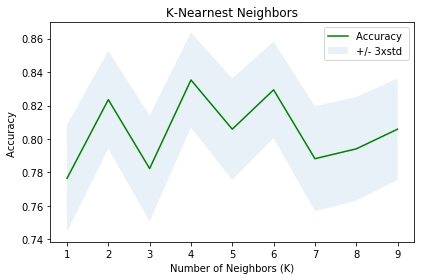

In [204]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.title('K-Nearnest Neighbors')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

<hr/>

<div id="decision_tree">
    <h2>Decision Tree</h2>
</div>

### Import Requried Libraries

In [238]:
from sklearn.tree import DecisionTreeClassifier

### Import Datasets 

In [496]:
df = pd.read_csv('customer_loan.csv')
value = {0:'No',1:'Yes'}
df['Defaulted']= df['Defaulted'].fillna(0).astype('int').replace(value)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,No,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,No,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,Yes,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,No,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,No,NBA008,7.2


### 1. Pre-processing Customer Datasets

In [497]:
# prepare decision tree datasets from customer datasets

dt_df = df[['Customer Id','Age','Edu','Years Employed','Income','Card Debt','Other Debt','DebtIncomeRatio']]
dX = preprocessing.StandardScaler().fit_transform(dt_df)
dy = np.nan_to_num(df['Defaulted'].values)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,No,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,No,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,Yes,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,No,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,No,NBA008,7.2


### 2.  Spliting Training and Test Dataset

In [498]:
dX_train,dX_test,dy_train,dy_test = train_test_split(dX,dy, test_size=0.3,random_state=4)
print(dX_train.shape,dy_train.shape)
print(dX_test.shape,dy_test.shape)

(595, 8) (595,)
(255, 8) (255,)


### 3. Modeling Decision Tree

In [499]:
dct = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dct.fit(dX_train,dy_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 4. Predict Decision Tree using Data

In [500]:
dX_test_pred = dct.predict(dX_test)

<div id="evaluation">
    <h3>5. Evaluation</h3>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [501]:
from sklearn import metrics
metrics.accuracy_score(dy_test,dX_test_pred)

0.792156862745098

<div id="visualization">
    <h3>6. Visualization</h3>
    Lets visualize the tree.
</div>

In [502]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [503]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

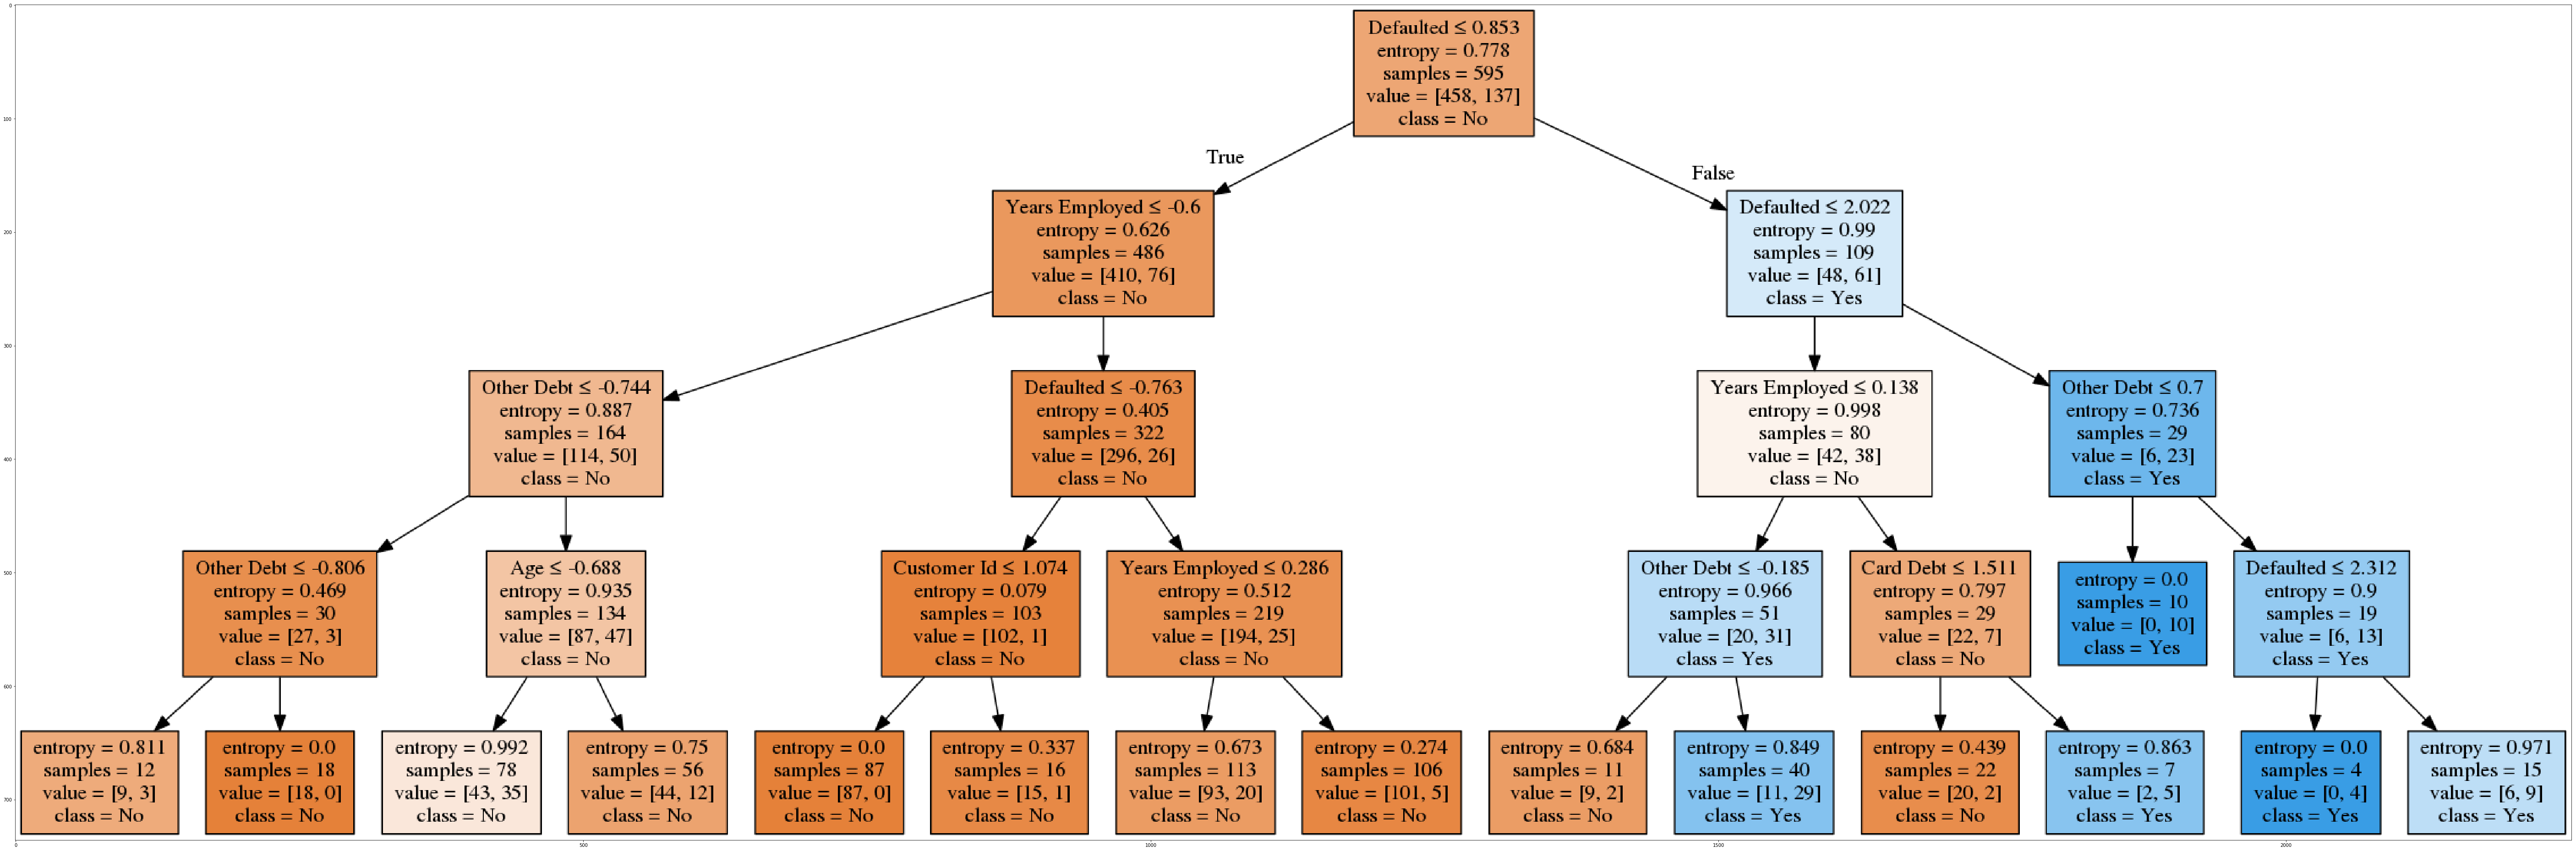

In [504]:
dot_data = StringIO()
filename = "custtree.png"
featureNames = df.columns[0:8]
targetNames = np.nan_to_num(df["Defaulted"].unique().tolist())
out=tree.export_graphviz(dct,feature_names=featureNames, out_file=dot_data, class_names= np.unique(dy_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.show()

<div id="support_vector_machine">
    <h2>Support Vector Machine</h2>
</div>

### Import Requried Libraries

In [505]:
import pylab as pl
import scipy.optimize as opt
%matplotlib inline 

### Import Datasets 

In [506]:
df = pd.read_csv('customer_loan.csv')
df['Defaulted']= df['Defaulted'].fillna(0).astype('int')
df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted            int64
Address             object
DebtIncomeRatio    float64
dtype: object

### 1. Pre-processing Customer Datasets

In [507]:
columns=['Customer Id','Age','Edu','Years Employed','Income','Card Debt','Other Debt','Defaulted','DebtIncomeRatio']
df = df[columns]
df['Card Debt']= df['Card Debt'].astype('int')
df['Other Debt']= df['Other Debt'].astype('int')
df['DebtIncomeRatio']= df['DebtIncomeRatio'].astype('int')
X = np.asarray(df)

y = np.asarray(df['Defaulted'])
y [0:5]

array([0, 0, 1, 0, 0])

### 2.  Spliting Training and Test Dataset

In [508]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
y_test

Train set: (680, 9) (680,)
Test set: (170, 9) (170,)


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 3. Modeling Support Vector Machine

In [509]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 4. Predict Support Vector Machine using Data

In [510]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

<div id="evaluation">
    <h3>5. Evaluation</h3>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [511]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [512]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/home/angryleo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.84      1.00      0.91       142
          1       0.00      0.00      0.00        28

avg / total       0.70      0.84      0.76       170

Confusion matrix, without normalization
[[142   0]
 [ 28   0]]


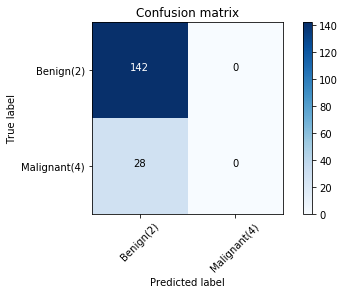

In [513]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [514]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

/home/angryleo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7603318250377074

In [515]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8352941176470589

<div id="logistic_regression">
    <h2>Logistic Regression</h2>
</div>

### Import Requried Libraries

In [523]:
import scipy.optimize as opt
%matplotlib inline 

### Import Datasets 

In [543]:
df = pd.read_csv('customer_loan.csv')
df.drop('Address',axis=1,inplace=True)
df['Defaulted'] = np.nan_to_num(df['Defaulted'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
Customer Id        850 non-null int64
Age                850 non-null int64
Edu                850 non-null int64
Years Employed     850 non-null int64
Income             850 non-null int64
Card Debt          850 non-null float64
Other Debt         850 non-null float64
Defaulted          850 non-null float64
DebtIncomeRatio    850 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.8 KB


### 1. Pre-processing Customer Datasets

In [548]:
columns=['Customer Id','Age','Edu','Years Employed','Income','Card Debt','Other Debt','DebtIncomeRatio']
df['Defaulted'] = df['Defaulted'].astype('int')
df.head()

X = np.asarray(df[columns])
X = preprocessing.StandardScaler().fit(X).transform(X)

y = np.asarray(df['Defaulted'])

### 2.  Spliting Training and Test Dataset

In [549]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (680, 8) (680,)
Test set: (170, 8) (170,)


### 3. Modeling Decision Tree

In [550]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 4. Predict Decision Tree using Data

In [551]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [556]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.7 , 0.3 ],
       [0.8 , 0.2 ],
       [0.69, 0.31],
       [0.73, 0.27],
       [0.42, 0.58],
       [0.51, 0.49],
       [0.79, 0.21],
       [0.49, 0.51],
       [0.53, 0.47],
       [0.72, 0.28],
       [0.76, 0.24],
       [0.69, 0.31],
       [0.65, 0.35],
       [0.64, 0.36],
       [0.53, 0.47],
       [0.59, 0.41],
       [0.83, 0.17],
       [0.8 , 0.2 ],
       [0.73, 0.27],
       [0.64, 0.36],
       [0.69, 0.31],
       [0.58, 0.42],
       [0.71, 0.29],
       [0.72, 0.28],
       [0.8 , 0.2 ],
       [0.62, 0.38],
       [0.64, 0.36],
       [0.65, 0.35],
       [0.66, 0.34],
       [0.56, 0.44],
       [0.71, 0.29],
       [0.67, 0.33],
       [0.7 , 0.3 ],
       [0.54, 0.46],
       [0.77, 0.23],
       [0.8 , 0.2 ],
       [0.79, 0.21],
       [0.64, 0.36],
       [0.67, 0.33],
       [0.73, 0.27],
       [0.32, 0.68],
       [0.67, 0.33],
       [0.72, 0.28],
       [0.61, 0.39],
       [0.68, 0.32],
       [0.65, 0.35],
       [0.5 , 0.5 ],
       [0.77,

<div id="evaluation">
    <h3>5. Evaluation</h3>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

#### jaccard index

In [557]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8

#### Confusion Metrix

In [558]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  6  22]
 [ 12 130]]


Confusion matrix, without normalization
[[  6  22]
 [ 12 130]]


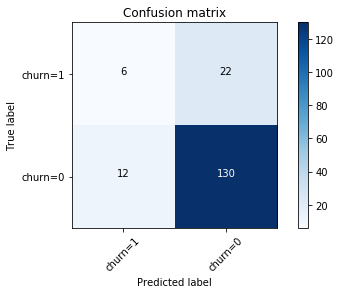

In [559]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

#### Log loss

In [560]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4775684263683846